In [44]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Concatenate, Input

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

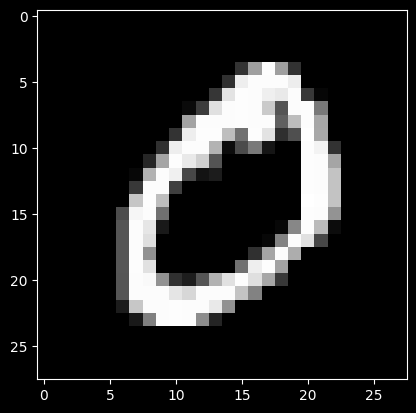

In [46]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap='gray')

In [47]:
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255

In [48]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [49]:
seq_model = Sequential()
seq_model.add(Dense(64, activation='relu', input_shape=(784,)))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(10, activation='softmax'))
seq_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
seq_model.fit(x_train_flat, y_train, epochs=5, batch_size=32, verbose=1, validation_data=(x_test_flat, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8489 - loss: 0.5229 - val_accuracy: 0.9549 - val_loss: 0.1543
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9564 - loss: 0.1466 - val_accuracy: 0.9667 - val_loss: 0.1156
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9691 - loss: 0.1036 - val_accuracy: 0.9690 - val_loss: 0.1034
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9756 - loss: 0.0799 - val_accuracy: 0.9708 - val_loss: 0.0949
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0649 - val_accuracy: 0.9738 - val_loss: 0.0869


In [51]:
seq_model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9684 - loss: 0.1096


[0.08691198378801346, 0.973800003528595]

In [52]:
input = Input(shape=(784,))
hidden_1 = Dense(64, activation='relu')(input)
hidden_2 = Dense(32, activation='relu')(hidden_1)
hidden_3 = Dense(10, activation='softmax')(input)
concat = Concatenate()([hidden_2, hidden_3])
output = Dense(10, activation='softmax')(concat)
model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(x_train_flat, y_train, epochs=5, batch_size=1024, verbose=1)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5283 - loss: 1.5937
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8973 - loss: 0.3740
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9265 - loss: 0.2642
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9377 - loss: 0.2219
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9448 - loss: 0.1909


In [54]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9395 - loss: 0.2030


[0.17390474677085876, 0.9491000175476074]

In [55]:
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │     50,240 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 32)        │      2,080 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 10)        │      7,850 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 42)        │          0 │ dense_25[0][0],   │
│ (Concatenate)       │                   │            │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 10)        │        430 │ concatenate_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 181,802 (710.17 KB)

 Trainable params: 60,600 (236.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 121,202 (473.45 KB)